In [1]:
import PIL
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pathlib
data_dir = pathlib.Path('.//DigitData/')
data_dir

WindowsPath('DigitData')

In [3]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('DigitData/0/img_1.jpg'),
 WindowsPath('DigitData/0/img_10007.jpg'),
 WindowsPath('DigitData/0/img_10010.jpg'),
 WindowsPath('DigitData/0/img_10017.jpg'),
 WindowsPath('DigitData/0/img_10032.jpg')]

In [5]:
print('total images are : ',len(list(data_dir.glob('*/*.jpg'))) )

total images are :  42000


In [7]:
digit_images_dict = {
    'zero': list(data_dir.glob('0/*'))[:500],
    'one': list(data_dir.glob('1/*'))[:500],
    'two': list(data_dir.glob('2/*'))[:500],
    'three': list(data_dir.glob('3/*'))[:500],
    'four': list(data_dir.glob('4/*'))[:500],
    'five': list(data_dir.glob('5/*'))[:500],
    'six': list(data_dir.glob('6/*'))[:500],
    'seven': list(data_dir.glob('7/*'))[:500],
    'eight': list(data_dir.glob('8/*'))[:500],
    'nine': list(data_dir.glob('9/*'))[:500],
    
}

In [8]:

digit_label_dict = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three':3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven':7,
    'eight':8,
    'nine':9 ,
    
}

In [10]:
X,y=[],[]
for name , images in digit_images_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resize_img = cv.resize(img,(28,28))
        X.append(resize_img)
        y.append(digit_label_dict[name])

In [11]:
# X and y into numpy array
X=np.array(X)
y=np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

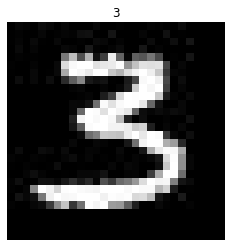

In [14]:
plt.imshow(X_train[15])
plt.title(y_train[15])
plt.axis("off")
plt.show()

# convolution neural network

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [17]:


# Initialising the CNN

model=Sequential();

# Step 1 - Convolution
model.add(Conv2D(32,(3,3),input_shape=(28,28,3),padding = 'Same',activation='relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Step 1 - Convolution
model.add(Conv2D(16,(3,3),padding = 'Same',activation='relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))


# Step 3 - Flattening
model.add(Flatten())


# Step 4 - Full connection

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compiling the CNN
model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [18]:
X_train

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[10, 10, 10],
         [ 0,  0,  0],
         [ 4, 

In [19]:
X_train_Scaled=X_train/255
X_test_Scaled=X_test/255

In [20]:
model.fit(X_train_Scaled, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
110/110 [==============================] - 23s 137ms/step - loss: 0.8069 - accuracy: 0.7400
Epoch 2/5
110/110 [==============================] - 15s 140ms/step - loss: 0.2463 - accuracy: 0.9231
Epoch 3/5
110/110 [==============================] - 16s 144ms/step - loss: 0.1471 - accuracy: 0.9509
Epoch 4/5
110/110 [==============================] - 15s 141ms/step - lo

In [21]:
model.evaluate(X_test_Scaled,y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - 3s 51ms/step - loss: 0.1570 - accuracy: 0.9527


[0.15697789192199707, 0.9526666402816772]

In [22]:
predictions = model.predict(X_test_Scaled)
predictions

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[9.9963224e-01, 2.0262448e-12, 1.2008095e-06, ..., 2.5975664e-11,
        1.1782436e-07, 6.5922562e-10],
       [2.8394354e-06, 4.0386947e-09, 3.2965615e-06, ..., 9.5952356e-01,
        1.4250195e-06, 4.0434275e-02],
       [2.2208907e-08, 3.2758829e-09, 1.7385974e-09, ..., 8.5297543e-05,
        1.6335223e-06, 9.9983585e-01],
       ...,
       [3.8345917e-08, 1.9835175e-08, 9.9999845e-01, ..., 8.5988543e-11,
        1.1996741e-06, 6.4246720e-12],
       [1.9360668e-08, 1.8704711e-07, 3.3759242e-09, ..., 2.2203842e-12,
        6.7238048e-05, 2.8831748e-06],
       [4.2119911e-08, 2.5437850e-05, 9.9997222e-01, ..., 2.1562799e-10,
        9.6696454e-07, 6.4793535e-15]], dtype=float32)

In [27]:
score =tf.nn.softmax(predictions[98])
np.argmax(score)

5

In [28]:
y_test[98]

5

In [3]:
import tensorflow as tf

ArrowKeyError: A type extension with name arrow.py_extension_type already defined

In [ ]:
model = tf.keras.models.load_model('test/Digit 1.0v.h5')

#  custom image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('5.jpg',
                         target_size = (28,28))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=model.predict(test_image)
#      0 ,6 ,7 ,4
print(result)


In [14]:
n=np.where(result==1.0)
print('Detected number :',n[1][0])

Detected number : 5


# save model

In [1]:
import tensorflow as tf
model.save("model_saved.h5")


KeyboardInterrupt



In [17]:
saved_model = tf.keras.models.load_imodel("model_saved.h5")

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('5.jpg',
                         target_size = (28,28))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=saved_model.predict(test_image)
n=np.where(result==1.0)
print('Detected number :',n[1][0])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Detected number : 5
